In [2]:
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

import pandas as pd
import pandas_datareader as web

In [13]:
start = datetime.datetime(2019,3,9)
end = datetime.datetime(2020,3,12)

df = web.DataReader('5225.KL','yahoo',start,end)
df.to_csv('stock2.csv')
df = pd.read_csv('stock2.csv')
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
247,2020-03-06,5.81,5.56,5.56,5.75,3291700,5.75
248,2020-03-09,5.77,5.54,5.65,5.69,8292000,5.69
249,2020-03-10,5.74,5.56,5.69,5.59,8510600,5.59
250,2020-03-11,5.64,5.57,5.59,5.59,6572000,5.59
251,2020-03-12,5.62,5.42,5.59,5.56,7043700,5.56


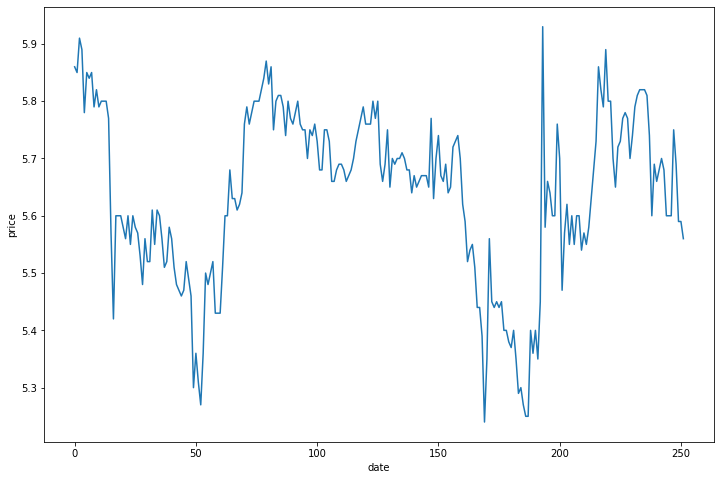

In [14]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [15]:
X = df[['High','Low','Open','Volume']].values
y = df['Close'].values

In [17]:
train_pct_index = int(0.9*len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [18]:
regressor = LinearRegression()

In [19]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
regressor.score(X_train,y_train)

0.9483355587556463

In [21]:
pred = regressor.predict(X_test)

In [22]:
mean_squared_error(y_test,pred)

0.0013839802803800648

Text(0, 0.5, 'y')

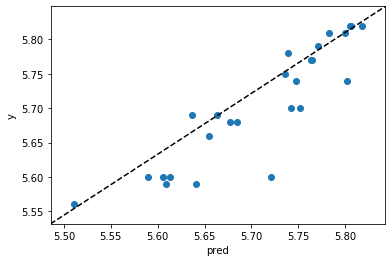

In [23]:
plt.scatter(pred, y_test, label='Sal')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)#draws the dotted line
plt.xlabel('pred')
plt.ylabel('y')